# **Análisis de Revenue Management - Hotel Booking Demand**

---

# **Descripción del Proyecto**

Este proyecto tiene como objetivo analizar y optimizar la gestión de ingresos (Revenue Management) en hoteles utilizando datos de reservas históricas. Se trabajará con el [dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) Hotel Booking Demand, el cual contiene información sobre reservas de dos tipos de hoteles (City Hotel y Resort Hotel).

El análisis se divide en dos partes clave:


---



1️⃣ Segmentación de clientes basada en patrones de reserva

Identificación de grupos de clientes según comportamiento de reserva.
Análisis del Lead Time, ADR (Tarifa Promedio), duración de estancia y canal de reserva.
Creación de estrategias para optimizar la ocupación y la rentabilidad.


---


2️⃣ Impacto de la estacionalidad en la tarifa promedio (ADR)

Evaluación de cómo varía el ADR según la temporada del año.
Análisis comparativo entre hoteles urbanos y resorts.
Estrategias de pricing basadas en la demanda estacional.

---
#**Proceso del Análisis**
✅ ETL (Extracción, Transformación y Carga) → Limpieza y preparación de datos.
✅ Exploración y visualización → Identificación de patrones y tendencias.

**Este proyecto permite entender cómo los factores temporales y de comportamiento del cliente afectan la rentabilidad de los hoteles, ayudando a optimizar estrategias de precios y ocupación**.


In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**PASOS DEL ANÁLISIS**

En primer lugar, subimos nuestro dataset. En este caso, es un dataset relacionado a la demanda de reservas en hoteles. Fue descargado de Kaggle, aquí: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-*demand*

In [ ]:
# subimos nuestro dataset
data = pd.read_csv('/content/drive/MyDrive/Data Analysis/hotel_bookings.csv', sep=';')

Ahora, *debemos preparar los datos*

**ETL para el Análisis de Booking Demand**

**1. EXTRACCIÓN (E)**

In [ ]:
#revisamos el head y la estructura de los datos que acabamos de subir
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/2015


In [ ]:
len(data)

119390

In [ ]:
data["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
#también revisamos la estructura y el tipo de datos del dataset que subimos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**2. TRANSFORMACIÓN (T)** ⛑

In [ ]:
#revisamos si hay valores nulos
print(data.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**solo hay una (1) variable que es númerica, que es el número de hijos "children" entonces reemplazaremos esos valores nulos (4) con la moda**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

data["children"].fillna(data["children"].mean(), inplace=True)

**Como los demás datos nulos son variables categóricas, vamos a reemplazar estos valores nulos con "N/A"**

In [ ]:
# Rellenar nulos en 'agent', 'company' y "country" con "Sin agencia", "Sin empresa" y "na", respectivamente:

import warnings
warnings.simplefilter(action='ignore', category=Warning)

data["agent"].fillna("Sin agencia", inplace=True)
data["company"].fillna("Sin empresa", inplace=True)
data["country"].fillna("na", inplace=True)

In [ ]:
#verificamos que las actualizaciones se hayan hecho correctamente
print(data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Sisualizaremos algunos gráficos para entender la composición de nuestros datos**

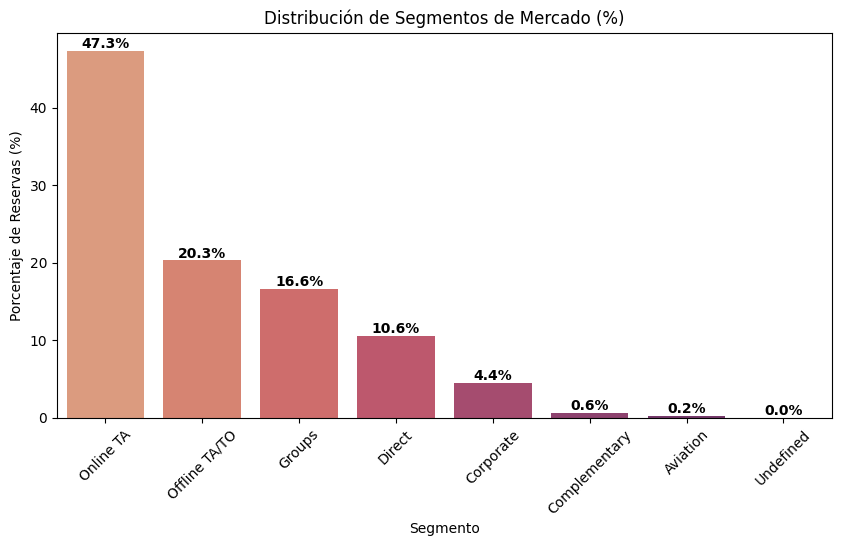

In [ ]:
#Podemos visualizar la distribución de las reservas de acuerdo al % de participación en cada segmento:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la proporción de cada segmento (% sobre el total)
participación_segmentos = data["market_segment"].value_counts(normalize=True) * 100  # Convierte en %

# Crear gráfico de barras
plt.figure(figsize=(10,5))
ax = sns.barplot(x=participación_segmentos.index, y=participación_segmentos.values, palette="flare")

# Agregar porcentajes sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.title("Distribución de Segmentos de Mercado (%)")
plt.xlabel("Segmento")
plt.ylabel("Porcentaje de Reservas (%)")
plt.show()

A pesar que la relación entre el lead time y el ADR no es uniforme y depende de múltiples factores, incluyendo la demanda del mercado, la estrategia de precios de los hoteles y el comportamiento de los consumidores, se pueden encontrar situaciones de alta demanda donde los hoteles pueden incrementar las tarifas a medida que se acerca la fecha de estancia, aprovechando la urgencia de los viajeros que reservan en el último momento. Esta práctica puede resultar en un ADR más alto para reservas con menor lead time.

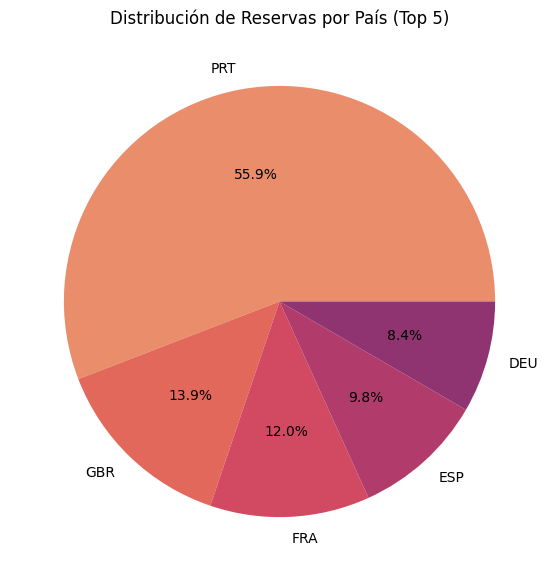

In [ ]:
#POr ult, graficamos los 5 países con más reservas (con su participación %)

top5_países = data["country"].value_counts().head(5)

#creamos un gráfico pastel

plt.figure(figsize=(7,7))
plt.pie(top5_países, labels=top5_países.index, autopct="%1.1f%%", colors=sns.color_palette("flare"))
plt.title("Distribución de Reservas por País (Top 5)")
plt.show()


1️⃣ **Segmentación de clientes basada en patrones de reserva**

**Identificación de grupos de clientes según comportamiento de reserva. Análisis del Lead Time, ADR (Tarifa Promedio), duración de estancia y canal de reserva. Creación de estrategias para optimizar la ocupación y la rentabilidad.**

*   ✔ Lead Time: ¿Cuántos días antes se reserva? - anticipación
*   ✔ ADR: ¿Cuánto paga en promedio?
*   ✔ Duración de estancia: ¿Cuántas noches se queda? - room nights (RN)
*   ✔ Canal de reserva: ¿Desde dónde reserva? - segmentación








In [ ]:
#podemos realizar la segmentación de los clientes aplicando clustering. El método más usado es K-means clustering. Para ello, debemos normalizar primero los datos e importamos la libreria de kmeans

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Seleccionamos las variables clave por las cuales queremos que se segmenten los clientes
X = data[["lead_time", "adr", "stays_in_week_nights", "stays_in_weekend_nights"]]

# Normalizamos datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos K-Means con 4 segmentos (este numoer de segmentaciones puede ser modificado de acuerdo a cuantas segmentaciones se desee)
kmeans = KMeans(n_clusters=4, random_state=42)
data["cluster"] = kmeans.fit_predict(X_scaled)

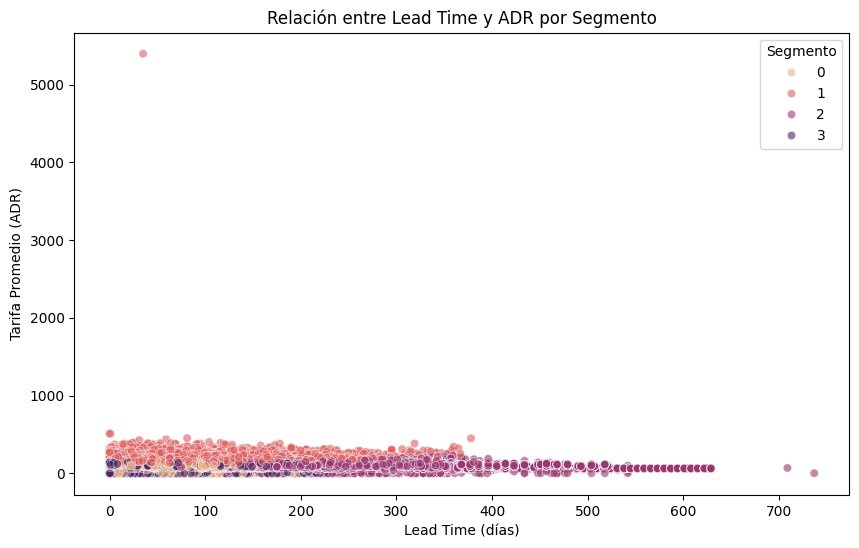

In [ ]:
#ahora podemos graficas las 4 segmentaciones

plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="lead_time", y="adr", hue="cluster", palette="flare", alpha=0.6)
plt.title("Relación entre Lead Time y ADR por Segmento")
plt.xlabel("Lead Time (días)")
plt.ylabel("Tarifa Promedio (ADR)")
plt.legend(title="Segmento")
plt.show()


**De lo anterior, podemos inferir que**

1️⃣ La mayoría de las reservas tienen un Lead Time bajo (menos de 100 días).

Hay una alta concentración de puntos en la parte izquierda del gráfico.
Esto indica que los clientes suelen reservar con poca anticipación.

---

2️⃣ Algunas reservas tienen Lead Time muy alto (más de 500 días).

Son casos aislados, probablemente contratos de grupos o reservas corporativas.

---


3️⃣ El ADR (Tarifa Promedio) tiene valores extremos.

Hay algunas reservas con ADR mayor a 5000, lo cual podría ser outliers o tarifas especiales.
La mayoría de los ADR están por debajo de 500.


---
**Los hoteles que muestren un comportamiento similar al anterior, podrían comenzar a implementar medidas como un % de descuento por early booking, para estimular el booking para estancias dentro de +300 día. Esto podría asegurar un buen 'colchon' para los hoteles y comenzar a configurar un ADR sólido.**




In [ ]:
# Para corroborar le mecionado con anterioridad (...) "A pesar que la relación entre el lead time y el ADR no es uniforme y depende de múltiples factores", podemos hacer una correalación entre estas dos variables

data[["lead_time", "adr"]].corr()

# la correlación entre ambas es de (-0,6, esto indica una relación moderada. Y como es negativa, se presume una relación inversa entre ambas, es decir, e.g. que cuanto mayor es el lead time, menor suele ser el ADR
# y cuanto menor es el lead time, mayor suele ser el ADR.

,lead_time,adr
lead_time,1.000000,-0.063077
adr,-0.063077,1.000000


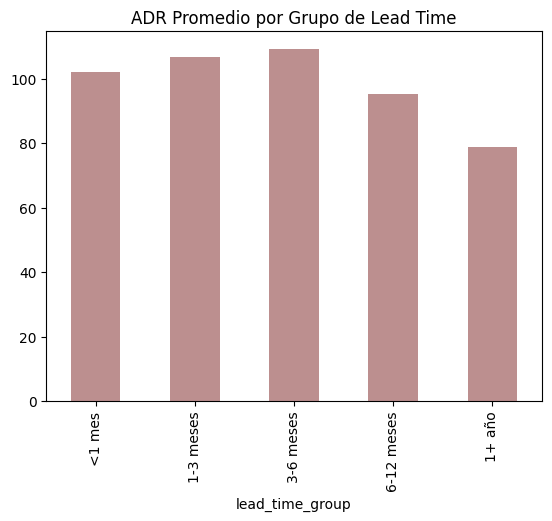

In [ ]:
data["lead_time_group"] = pd.cut(data["lead_time"], bins=[0, 30, 90, 180, 365, 700],
                               labels=["<1 mes", "1-3 meses", "3-6 meses", "6-12 meses", "1+ año"])
data.groupby("lead_time_group")["adr"].mean().plot(kind="bar", color="rosybrown")
plt.title("ADR Promedio por Grupo de Lead Time")
plt.show()

2️⃣ **Impacto de la estacionalidad en la tarifa promedio (ADR)**

**Evaluación de cómo varía el ADR según la temporada del año. Análisis comparativo entre hoteles urbanos y resorts. Estrategias de pricing basadas en la demanda estacional**

In [ ]:
# primero debemos preparar nuestro dataset para crear la estacionalida, esto lo haaremos con la variable "arrival_data_month"
#usaremos una función para definir la estación de acuerdo al número del mes

#dic, enero y feb: Alta invierno
#junio, julio y agosto Alta verano
#marzo, abril y mayo: media primavera
#todo los demás meses serán retornados como Baja otoño

def categorize_season(month):
    if month in [12, 1, 2]: return "Alta (Invierno)"
    elif month in [6, 7, 8]: return "Alta (Verano)"
    elif month in [3, 4, 5]: return "Media (Primavera)"
    else: return "Baja (Otoño)"

data["season"] = data["arrival_date_month"].apply(categorize_season)

In [ ]:
data["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

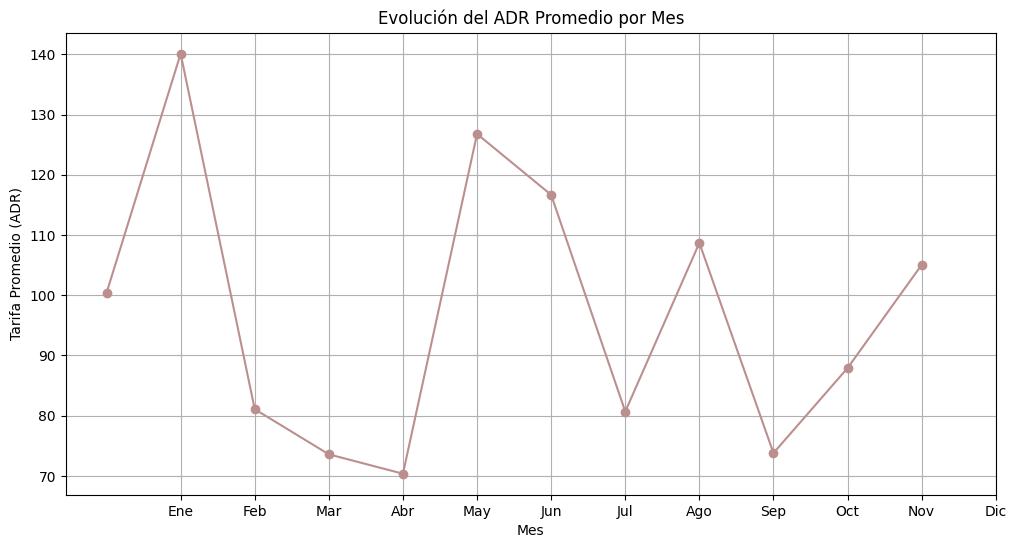

In [ ]:
#ahora visualizaremos el ADR por c/mes

plt.figure(figsize=(12,6))
data.groupby("arrival_date_month")["adr"].mean().plot(kind="line", marker="o", color="rosybrown")
plt.title("Evolución del ADR Promedio por Mes")
plt.xlabel("Mes")
plt.ylabel("Tarifa Promedio (ADR)")
plt.xticks(ticks=range(1,13), labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.grid(True)
plt.show()

#podemos observar que los mayores picos (del ADR promedio mes) se da entre julio-agosto, es decir, alta (verano)

**En conclusión**:
Temporada alta → ADR más alto → Estrategias de precios alta.
Temporada baja → ADR más bajo → Descuentos y promociones para atraer clientes y estimular el early booking.


Podemos agregar modelos predictivos (Regresión, XGBoost), series de tiempo, con el fin de establecer la influencia de la estacionalidad sobre el ADR

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

df= pd.read_csv("/content/drive/MyDrive/Data Analysis/hotel_bookings.csv", sep=";")

In [149]:
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [150]:
# Mapear meses a números
month_map = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}
df["arrival_date_month"] = df["arrival_date_month"].map(month_map)

In [151]:
# Función para categorizar temporadas
def categorize_season(month):
    if month in [12, 1, 2]: return "Alta (Invierno)"
    elif month in [6, 7, 8]: return "Alta (Verano)"
    elif month in [3, 4, 5]: return "Media (Primavera)"
    else: return "Baja (Otoño)"

In [153]:
df["season"] = df["arrival_date_month"].apply(categorize_season)

# One-Hot Encoding para la temporada
df = pd.get_dummies(df, columns=["season"], drop_first=True)

# Verificar que las columnas de temporada se crearon bien
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'season_Alta (Verano)',
       'season_Baja (Otoño)', 'season_Media (Primavera)'],
      dtype='object')


In [177]:
#Modelo de regresión lineal

# Seleccionar variables predictoras y target
features = [col for col in df.columns if "season_" in col]
X = df[features]
y = df["adr"]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)

# Evaluación del modelo
print("Regresión Lineal:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

Regresión Lineal:
MAE: 32.52095095619629
MSE: 1903.031978581038
R²: 0.16788568435757933


In [181]:
#modelo XGBOOST

# Crear y entrenar el modelo XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb.predict(X_test)

# Evaluación
print("XGBoost:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))

XGBoost:
MAE: 32.52093998033603
MSE: 1903.0317560536923
R²: 0.1678857816592495


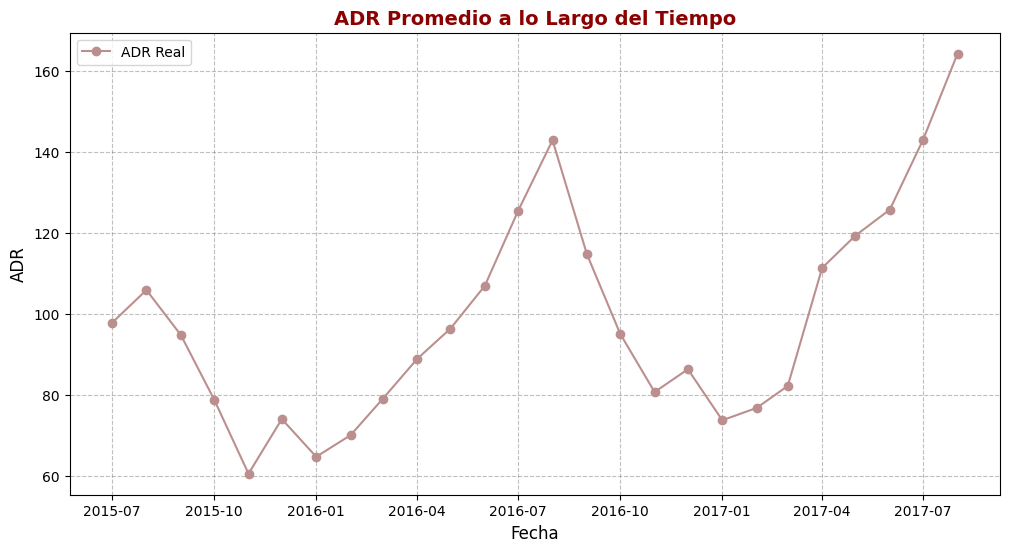

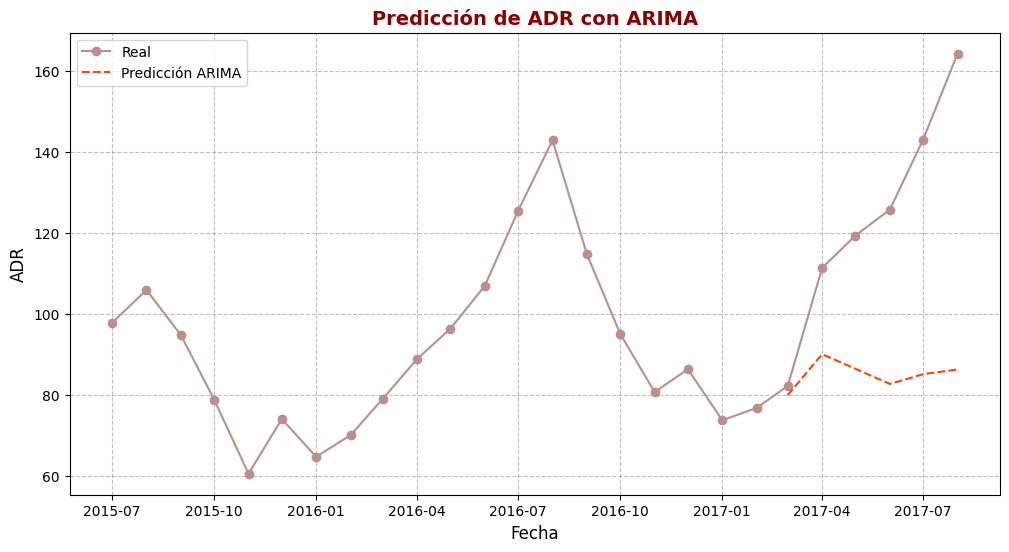

In [170]:
import matplotlib.pyplot as plt

# Graficar serie de tiempo con colores personalizados
plt.figure(figsize=(12,6))
plt.plot(df_time.index, df_time["adr"], marker="o", linestyle="-", color="rosybrown", label="ADR Real")
plt.title("ADR Promedio a lo Largo del Tiempo", fontsize=14, fontweight="bold", color="darkred")
plt.xlabel("Fecha", fontsize=12, color="black")
plt.ylabel("ADR", fontsize=12, color="black")
plt.legend()
plt.grid(color="gray", linestyle="--", alpha=0.5)
plt.show()

# Graficar predicciones ARIMA con colores personalizados
plt.figure(figsize=(12,6))
plt.plot(df_time.index, df_time["adr"], label="Real", marker="o", linestyle="-", color="rosybrown")
plt.plot(df_time.index, df_time["forecast"], label="Predicción ARIMA", linestyle="dashed", color="orangered")
plt.title("Predicción de ADR con ARIMA", fontsize=14, fontweight="bold", color="darkred")
plt.xlabel("Fecha", fontsize=12, color="black")
plt.ylabel("ADR", fontsize=12, color="black")
plt.legend()
plt.grid(color="gray", linestyle="--", alpha=0.5)
plt.show()


Con base en los valores obtenidos:
MAE = 32.52
MSE = 1903.03
R² = 0.168 → *Solo el 16.8% de la variabilidad del ADR es explicada por la temporada.*


👉 La temporada ("season") no es un buen predictor del ADR por sí sola. Hay otros factores que influyen mucho más en la tarifa promedio del hotel. Podríamos incluir otras variables con el fin de que el modelo sea más robusto y sirva para hacer predicciones.

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el dataset
df= pd.read_csv("/content/drive/MyDrive/Data Analysis/hotel_bookings.csv", sep=";")

In [186]:
# Crear la variable 'season'
def categorize_season(month):
    if month in [12, 1, 2]: return "Alta (Invierno)"
    elif month in [6, 7, 8]: return "Alta (Verano)"
    elif month in [3, 4, 5]: return "Media (Primavera)"
    else: return "Baja (Otoño)"

df["season"] = df["arrival_date_month"].map({
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}).apply(categorize_season)

In [189]:
# Codificación de variables categóricas
ohe = OneHotEncoder(drop='first', sparse_output=False) # Changed 'sparse' to 'sparse_output'
categorical_features = ["season", "customer_type", "reserved_room_type", "distribution_channel", "country"]
categorical_encoded = ohe.fit_transform(df[categorical_features])
categorical_df = pd.DataFrame(categorical_encoded, columns=ohe.get_feature_names_out(categorical_features))

In [190]:
# Escalado de variables numéricas
scaler = StandardScaler()
numerical_features = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "arrival_date_day_of_month"]
numerical_scaled = scaler.fit_transform(df[numerical_features])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_features)

# Unir las variables procesadas
df_processed = pd.concat([numerical_df, categorical_df, df[["adr"]].reset_index(drop=True)], axis=1)

# Dividir en train y test
X = df_processed.drop(columns=["adr"])
y = df_processed["adr"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 28.134241379608607
MSE: 1424.6896522916365
R²: 0.37978695624988223


A pesar que se le agregaron variables como el lead time, stay in weekend nights, arrival date, el modelo tiene un ajuste del 0.379, es decir, solo el 38% de la variabilidad del ADR es explicada por estas variables.